In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_roc_curve, classification_report
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
main_df = pd.read_csv("/Users/tejaswanidash/Desktop/Projects/Creditcard Fraud/creditcard.csv")
df = main_df.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# 0 Normal Transaction
# 1 Fraud Transaction

legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
# Statistical Measure of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
# Undersampling
# Build a sample dataset containing the similar distribution of the normal transactions and Fraudulent Transactions

legit_sample = legit.sample(n=492)

In [13]:
# concatenating 2 dataset
new_df= pd.concat([legit_sample, fraud], axis = 0)

In [14]:
new_df.shape
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
20266,30913.0,-1.237553,0.540558,2.155555,0.751208,-0.770681,0.281009,-0.549543,-0.580252,0.700200,...,0.758159,0.117616,-0.080448,0.445262,-0.805505,0.431496,-0.430564,-0.443203,19.96,0
5357,5292.0,1.238845,0.334216,0.308136,0.712542,-0.166144,-0.534028,-0.183806,-0.059020,1.232319,...,-0.419760,-1.047327,0.099261,-0.130932,0.173455,0.062395,-0.060647,0.008728,1.98,0
194876,130796.0,1.529952,-1.484287,-2.742804,-0.272276,0.058723,-1.011220,0.907035,-0.627817,-0.845274,...,0.017648,-0.192616,-0.332143,0.482244,0.407532,-0.472187,-0.084449,0.005281,381.00,0
157565,110059.0,-0.615479,0.599480,2.051707,-0.531983,1.041218,1.766595,0.159948,0.350480,1.336644,...,-0.222255,-0.124706,-0.308028,-1.743106,0.094202,-0.614796,-0.036526,-0.173729,2.12,0
215396,140053.0,-1.687913,-0.501922,0.830765,-0.030106,2.374639,-0.514818,-0.238396,0.160443,-0.327288,...,-0.312079,-0.836021,-0.583131,0.031617,0.503126,-0.281751,0.119139,-0.032659,9.99,0


In [15]:
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [16]:
# Mean of each column is still approx. same which means sample are still same

new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95477.524390,0.061831,0.048865,0.104813,0.109018,0.066919,-0.045726,0.010969,0.003328,0.030581,...,-0.013795,0.043838,0.006063,-0.031159,0.061647,-0.004324,0.005253,0.032074,0.009759,77.600833
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
# Splitting the data into features & target
X = new_df.drop(columns = 'Class', axis=1)
Y = new_df['Class']

In [19]:
X.shape


(984, 30)

In [20]:
Y.shape

(984,)

In [21]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [22]:
model_lr = LogisticRegression(max_iter=120,random_state=0, n_jobs=20, solver='liblinear')


In [23]:
model_lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn(


LogisticRegression(max_iter=120, n_jobs=20, random_state=0, solver='liblinear')

In [24]:
trn_lr_pred = model_lr.predict(X_train)
trn_lr_acc = accuracy_score(trn_lr_pred, y_train)
print(round(trn_lr_acc*100, 2))

94.23


In [25]:
tst_lr_pred = model_lr.predict(X_test)
tst_lr_acc = accuracy_score(tst_lr_pred, y_test)
print(round(tst_lr_acc*100, 2))

94.15


<AxesSubplot:>

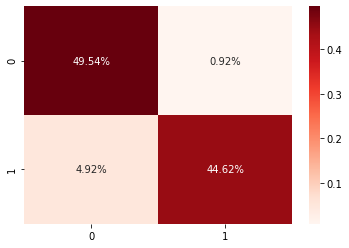

In [26]:
cm1 = confusion_matrix(y_test, tst_lr_pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


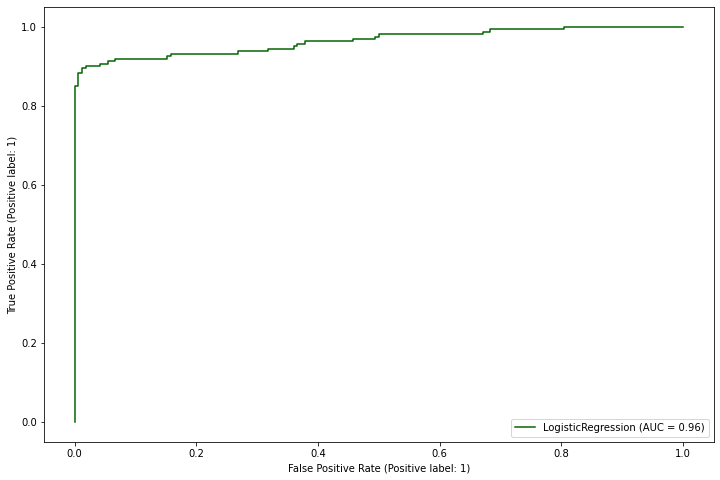

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(model_lr, X_test, y_test, color='darkgreen', ax=ax)

In [28]:
print(classification_report(y_test,tst_lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       164
           1       0.98      0.90      0.94       161

    accuracy                           0.94       325
   macro avg       0.94      0.94      0.94       325
weighted avg       0.94      0.94      0.94       325



In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [30]:
df.shape

(284807, 31)

In [31]:
X1 = df.drop(columns='Class', axis=1)
y1 = df['Class']

In [32]:
X1.shape, y1.shape

((284807, 30), (284807,))

In [33]:
sm = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=4)
X_oversampled , y_oversampled = sm.fit_resample(X1, y1)

In [34]:
pipeline = Pipeline([('model', LogisticRegression(solver='liblinear'))])
pipeline.fit(X_oversampled, y_oversampled)

Pipeline(steps=[('model', LogisticRegression(solver='liblinear'))])

In [35]:
# Summarize the fraud class distribution of the new SMOTE-transformed dataset
unique_original, counts_original = np.unique(y1, return_counts=True)
unique_oversampled, counts_oversampled = np.unique(y_oversampled, return_counts=True)

print('Original fraud class distribution:', dict(zip(unique_original, counts_original)))
print('New transformed fraud class distribution:',dict(zip(unique_oversampled, counts_oversampled)))

Original fraud class distribution: {0: 284315, 1: 492}
New transformed fraud class distribution: {0: 284315, 1: 284315}


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.33, random_state=42)

In [37]:
model_lr_smt = LogisticRegression(solver='liblinear')
model_lr_smt.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [38]:
trn_lr_smt_pred = model_lr.predict(X_train)
trn_lr_smt_acc = accuracy_score(trn_lr_smt_pred, y_train)
print(round(trn_lr_smt_acc*100, 2))

96.38


In [39]:
tst_lr_smt_pred = model_lr.predict(X_test)
tst_lr_smt_acc = accuracy_score(tst_lr_smt_pred, y_test)
print(round(tst_lr_smt_acc*100, 2))

96.39


<AxesSubplot:>

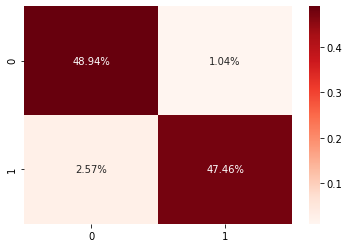

In [40]:
cm2 = confusion_matrix(y_test, tst_lr_smt_pred)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


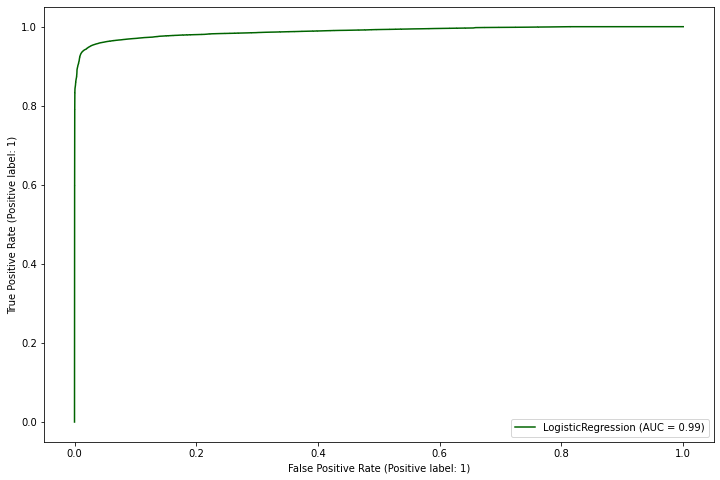

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_roc_curve(model_lr_smt, X_test, y_test, color='darkgreen', ax=ax)

In [42]:
print(classification_report(y_test,tst_lr_smt_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     93775
           1       0.98      0.95      0.96     93873

    accuracy                           0.96    187648
   macro avg       0.96      0.96      0.96    187648
weighted avg       0.96      0.96      0.96    187648



#### This model predicted 97 percentage accuracy in predicting the Credit Card Fraud detection.